In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("C:/Users/USER/Documents/Github/Machine Learning/datasets/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [11]:
df["sweet_density"] = df["residual sugar"] * df["density"]

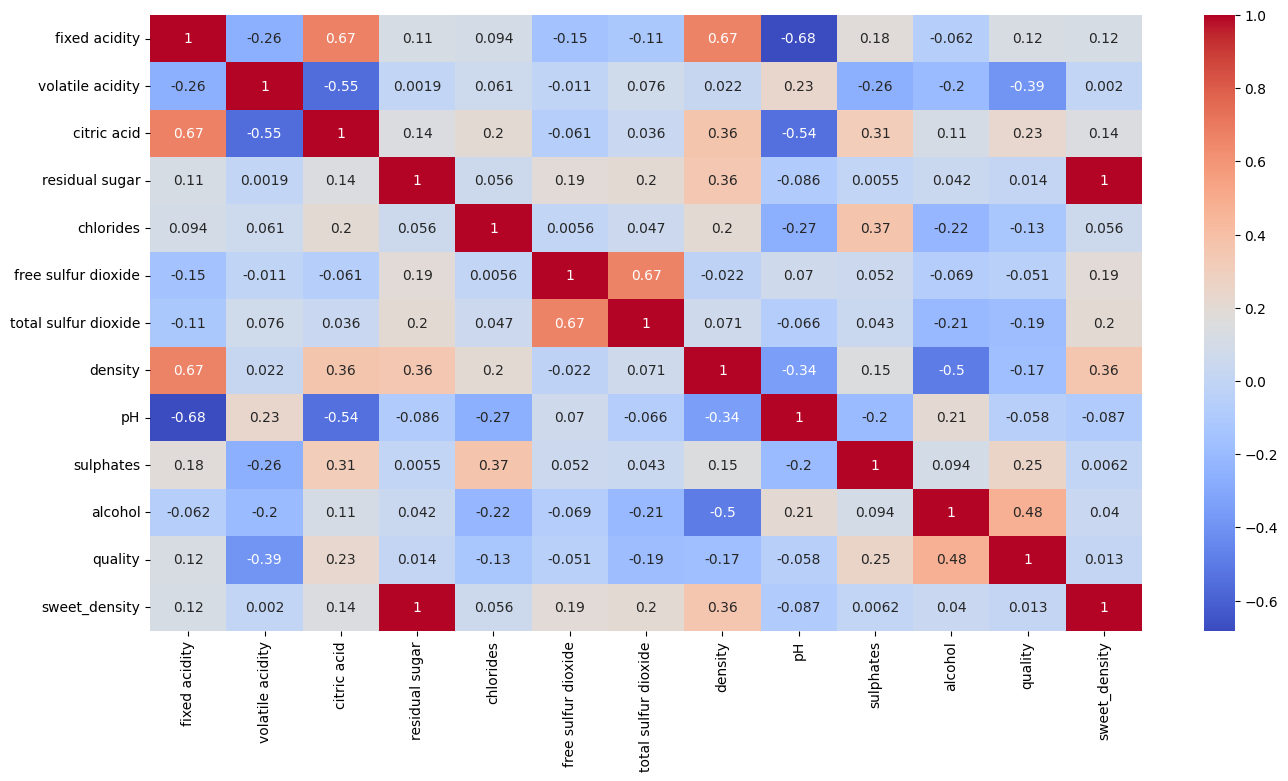

In [35]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot =True,cmap ="coolwarm")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,plot_tree

X=df.drop('quality',axis=1)
y=df['quality']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeRegressor(random_state=42)

param_grid={
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search=GridSearchCV(dt,param_grid,cv=5)

grid_search.fit(X_train, y_train)

best_model=grid_search.best_estimator_

y_pred=best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 0.5160
Test RMSE: 0.7183
Test MAE: 0.5248
Test R²: 0.2105


In [32]:
feature_importance=pd.DataFrame({
    'features':X.columns,
    'importance':best_model.feature_importances_
})

print(f"\nFeature Importance:")
print(feature_importance)





Feature Importance:
                features  importance
0          fixed acidity    0.026752
1       volatile acidity    0.121350
2            citric acid    0.034473
3         residual sugar    0.015134
4              chlorides    0.052830
5    free sulfur dioxide    0.041827
6   total sulfur dioxide    0.082879
7                density    0.025777
8                     pH    0.042456
9              sulphates    0.187097
10               alcohol    0.320668
11         sweet_density    0.048755


In [33]:
print("Best Params:", grid_search.best_params_)

Best Params: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


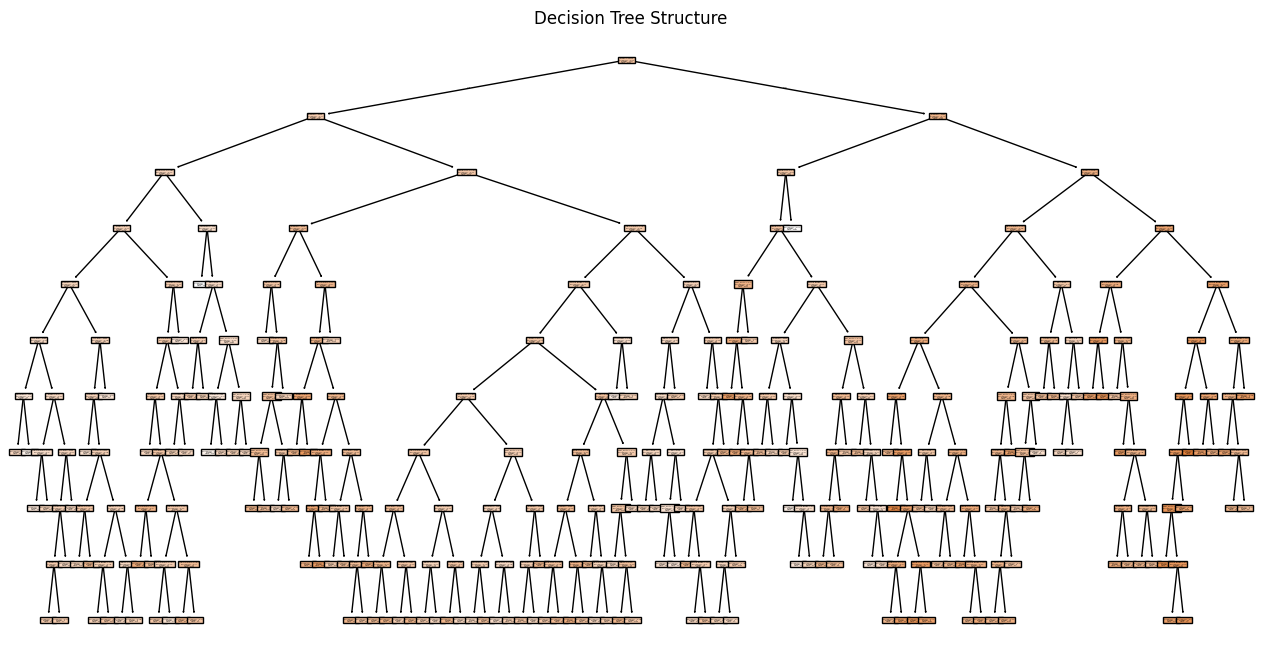

In [34]:

plt.figure(figsize=(16,8))
plot_tree(best_model,feature_names=X.columns,filled=True)
plt.title("Decision Tree Structure")
plt.show()